In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests

In [2]:
dfGames= pd.read_parquet("./Data/lichess-sampled.parquet")
#dfGames = dfGames.reset_index()
dfGames.head(3)

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/iclkx584,Voltvolf,Marzinkus,White,1824.0,1811.0,11.0,-11.0,C02,360+6,Normal,1. e4 e6 2. d4 d5 3. e5 c5 4. c3 Ne7 5. f4 cxd...,NaN,NaN,<NA>,2012-12-31 23:10:00
2,Classical,https://lichess.org/ufcqmfxx,6WX,adamsrj,White,1463.0,1504.0,62.0,-12.0,C44,1560+30,Normal,1. e4 e5 2. Nf3 Nc6 3. Bc4 Be7 4. d4 exd4 5. N...,NaN,NaN,<NA>,2012-12-31 23:16:04


In [3]:
openings = {}
with open('eco-codes.txt') as f:
    lines = f.readlines() # list containing lines of file
    
    for i, line in enumerate(lines):
        lineArray = line.split(": ")
        openings[i] = [lineArray[0], lineArray[1][:-1]]
        #openings[lineArray[0]] = lineArray[1][:-1]
        
dfOpenings = pd.DataFrame(data=openings, index=["Code", "Opening Name"]).T
#dfOpenings = pd.DataFrame(data=openings, index=["Opening Name"]).T
dfOpenings.loc["?"] = "Unknown"
dfOpenings.head(3)

,Code,Opening Name
0,A00,Irregular Openings
1,A01,Larsen's Opening
2,A02,Bird's Opening


In [4]:
dfGames = pd.merge(dfGames, dfOpenings, left_on="ECO", right_on="Code").drop("Code", axis=1)
dfGames = dfGames.reindex(columns=["Event", "Site", "White", "Black", "Result", "WhiteElo",
                                   "BlackElo", "WhiteRatingDiff", "BlackRatingDiff", "ECO", "Opening Name",
                                   "TimeControl", "Termination", "Moves", "WhiteTitle", "BlackTitle",
                                   "LichessId", "Date"])
dfGames["Opening Name"] = dfGames["Opening Name"].astype("category")
dfGames.head(3)

,Event,Site,White,Black,Result,WhiteElo,BlackElo,WhiteRatingDiff,BlackRatingDiff,ECO,Opening Name,TimeControl,Termination,Moves,WhiteTitle,BlackTitle,LichessId,Date
0,Classical,https://lichess.org/a9tcp02g,Desmond_Wilson,savinka59,White,1654.0,1919.0,19.0,-22.0,D04,Queen's Pawn Game,480+2,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Bf5 4. Nh4 Bg6 5. Nx...,NaN,NaN,<NA>,2012-12-31 23:04:12
1,Classical,https://lichess.org/ufwrwgqn,Malkav,bluemoon77,White,1298.0,1261.0,12.0,-11.0,D04,Queen's Pawn Game,300+5,Normal,1. d4 Nf6 2. e3 d5 3. Nf3 Bg4 4. h3 Bh5 5. Be2...,NaN,NaN,<NA>,2013-01-16 14:17:09
2,Classical,https://lichess.org/gjp68y4l,Nespro,FGR,Draw,1678.0,1456.0,-5.0,10.0,D04,Queen's Pawn Game,840+8,Normal,1. d4 d5 2. Nf3 Nf6 3. e3 Nc6 4. Bb5 a6 5. Bxc...,NaN,NaN,<NA>,2013-01-17 19:04:53


In [5]:
eloOpenings = dfGames[["Opening Name", "WhiteElo", "BlackElo", "Result"]]
eloOpenings.head()

,Opening Name,WhiteElo,BlackElo,Result
0,Queen's Pawn Game,1654.0,1919.0,White
1,Queen's Pawn Game,1298.0,1261.0,White
2,Queen's Pawn Game,1678.0,1456.0,Draw
3,Queen's Pawn Game,1304.0,1637.0,Black
4,Queen's Pawn Game,1861.0,1522.0,White


In [6]:
averageElos = pd.pivot_table(eloOpenings, values=["WhiteElo", "BlackElo"], index="Opening Name",  aggfunc="mean")
averageElos.head()

,BlackElo,WhiteElo
Opening Name,,
Alekhine's defense,1465.599442,1480.111189
"Alekhine's defense, Modern variation",1733.067720,1734.133183
"Alekhine's defense, Modern variation, 4...Bg4",1822.958904,1792.627854
Benko gambit,1823.564687,1806.826282
Benko gambit accepted,1946.245253,1939.860539


Top ten openings by average white ELO


,BlackElo,WhiteElo
Opening Name,,
"Sicilian, Richter-Rauzer, Rauzer attack, 7...a6 defense, 11.Bxf6",2295.000000,2273.000000
QGD; Anti-neo-Orthodox variation,2075.500000,2224.500000
QGA; Classical variation 8...Bb7,1995.500000,2161.500000
"QGD; Meran, 11.Nxb5",2065.000000,2157.428571
"Sicilian, Richter-Rauzer, Larsen variation, 7.Qd2",2075.555556,2134.888889
"Sicilian, Richter-Rauzer, Rauzer attack, 7...a6 defense, 8...Bd7",1985.777778,2130.166667
"King's Indian, SÃ¤misch, Panno Main line",2170.923077,2120.923077
"King's Indian, Orthodox, 7...Nbd7, 8.Re1",2003.464286,2115.607143
"Dutch, Ilyin-Genevsky variation with Qc2",1880.400000,2113.600000


<AxesSubplot:xlabel='Opening Name'>

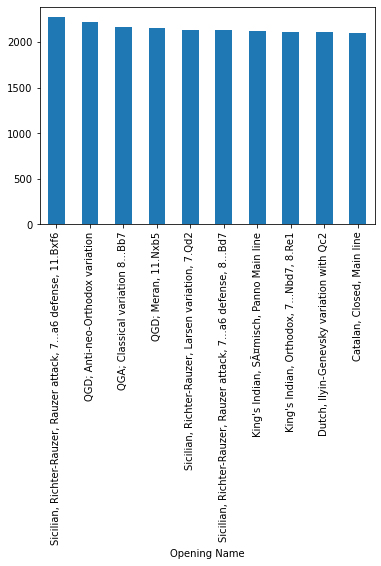

In [7]:
print("Top ten openings by average white ELO")
topWhite = averageElos.sort_values("WhiteElo", ascending=False)
display(topWhite.head(10))
display(topWhite["WhiteElo"].head(10).plot.bar())

Top ten openings by average black ELO


,BlackElo,WhiteElo
Opening Name,,
"Sicilian, Richter-Rauzer, Rauzer attack, 7...a6 defense, 11.Bxf6",2295.000000,2273.000000
"Benoni, Classical with ...Re8 and ...Na6",2196.000000,2057.500000
"Benoni, Fianchetto variation, 11...Re8",2182.000000,2099.500000
"King's Indian, SÃ¤misch, Panno Main line",2170.923077,2120.923077
"Nimzo-Indian, 4.e3, Gligoric system, Bronstein variation",2123.000000,1937.250000
"Benoni, Classical with ...a6 and 10...Bg4",2096.666667,2092.833333
"QGD; Orthodox defense, Classical, 13.dxe5",2092.000000,2021.600000
"GrÃ¼nfeld, Spassky variation, Main line, 13.Bd3",2086.062500,2052.125000
"Sicilian, Richter-Rauzer, Larsen variation, 7.Qd2",2075.555556,2134.888889


<AxesSubplot:xlabel='Opening Name'>

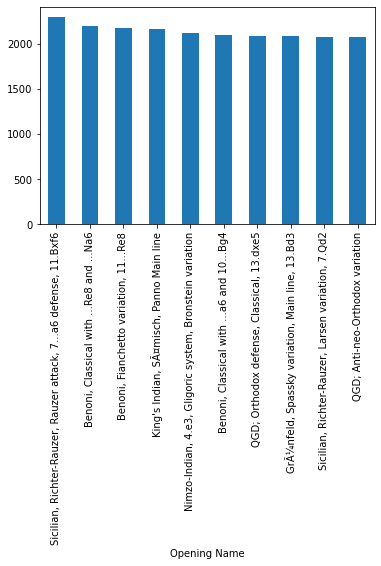

In [8]:
print("Top ten openings by average black ELO")
topBlack = averageElos.sort_values("BlackElo", ascending=False)
display(topBlack.head(10))
display(topBlack["BlackElo"].head(10).plot.bar())

Bottom ten openings by average white ELO


,BlackElo,WhiteElo
Opening Name,,
Irregular Openings,1485.317394,1455.810477
King's Knight Opening,1421.632811,1461.865843
King's Pawn Game,1473.161890,1466.907435
Three Knights Game,1481.834109,1471.782036
Richter-Veresov Attack,1501.589898,1474.481549
Vienna Game,1478.703544,1478.587174
Alekhine's defense,1465.599442,1480.111189
"Reti Opening, 2...d5",1505.637380,1488.158063
"Sicilian, Nimzovich-Rubinstein variation",1465.192146,1489.167696


<AxesSubplot:xlabel='Opening Name'>

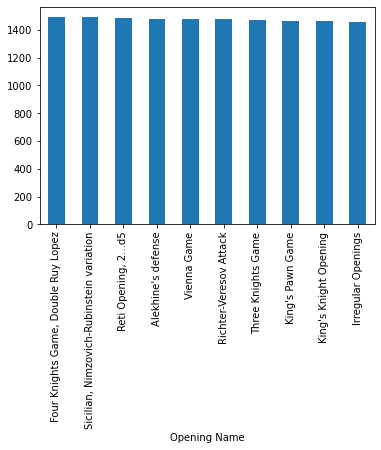

In [9]:
print("Bottom ten openings by average white ELO")
bottomWhite = averageElos.sort_values("WhiteElo", ascending=True)
display(bottomWhite.head(10))
display(bottomWhite["WhiteElo"].head(10).iloc[::-1].plot.bar())

Bottom ten openings by average black ELO


,BlackElo,WhiteElo
Opening Name,,
King's Knight Opening,1421.632811,1461.865843
"Sicilian, Nimzovich-Rubinstein variation",1465.192146,1489.167696
Alekhine's defense,1465.599442,1480.111189
King's Pawn Game,1473.161890,1466.907435
Petrov's Defense,1473.801768,1495.929512
Vienna Game,1478.703544,1478.587174
Bishop's Opening,1480.765704,1501.440501
Three Knights Game,1481.834109,1471.782036
"Petrov's Defense, Modern (Steinitz) Attack",1482.455160,1503.289777


<AxesSubplot:xlabel='Opening Name'>

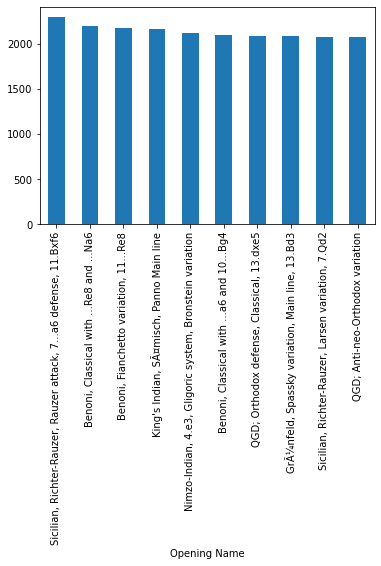

In [10]:
print("Bottom ten openings by average black ELO")
bottomBlack = averageElos.sort_values("BlackElo", ascending=True)
display(bottomBlack.head(10))
display(bottomBlack["BlackElo"].iloc[::-1].head(10).plot.bar())

In [11]:
openingResults = pd.pivot_table(eloOpenings, values=["Result"], index="Opening Name",  aggfunc="count")
openingResults.head(3)

,Result
Opening Name,
Alekhine's defense,41201
"Alekhine's defense, Modern variation",886
"Alekhine's defense, Modern variation, 4...Bg4",438


Top ten most common openings


,Result
Opening Name,
Queen's Pawn Game,453670
King's Pawn Game,432166
Sicilian defense,235065
Irregular Openings,221548
Scandinavian (centercounter) center defense,186140
French Defense,185078
Philidor Defense,181179
King's pawn Opening,159284
King's Knight Opening,113130


<AxesSubplot:xlabel='Opening Name'>

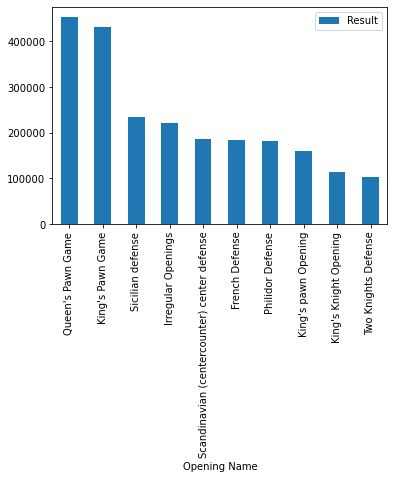

In [12]:
print("Top ten most common openings")
topOpenings = openingResults.sort_values("Result", ascending=False)
display(topOpenings.head(10))
display(topOpenings.head(10).plot.bar())

Top ten least common openings


,Result
Opening Name,
"Sicilian, Richter-Rauzer, Rauzer attack, 7...a6 defense, 11.Bxf6",1
"King's Indian, Four pawns attack, with Be2 and Nf3",1
"Neo-GrÃ¼nfeld, 5.cd, Main line",1
"Benoni, Classical, 11.f3",1
"Benoni, Classical with ...Re8 and ...Na6",2
QGD; Anti-neo-Orthodox variation,2
"Dutch, Ilyin-Genevsky variation with b3",2
"Nimzo-Indian, 4.e3, Main line with 8...Bxc3",2
QGA; Classical variation 8...Bb7,2


<AxesSubplot:xlabel='Opening Name'>

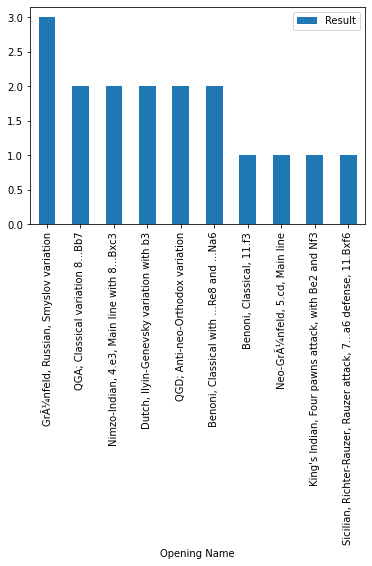

In [13]:
print("Top ten least common openings")
bottomOpenings = openingResults.sort_values("Result", ascending=True)
display(bottomOpenings.head(10))
display(bottomOpenings.head(10).iloc[::-1].plot.bar())

In [14]:
normalizedOpeningResults = pd.crosstab(eloOpenings["Opening Name"], eloOpenings["Result"], normalize="index")
#drop all openings with fewer than 50 games played
normalizedOpeningResults = pd.merge(normalizedOpeningResults, openingResults, left_on="Opening Name", right_on="Opening Name")
normalizedOpeningResults = normalizedOpeningResults[normalizedOpeningResults["Result"] > 50].drop("Result", axis=1)
normalizedOpeningResults.head(3)

,Black,Draw,Unknown,White
Opening Name,,,,
Alekhine's defense,0.433557,0.043688,0.000097,0.522657
"Alekhine's defense, Modern variation",0.445824,0.050790,0.001129,0.502257
"Alekhine's defense, Modern variation, 4...Bg4",0.479452,0.043379,0.000000,0.477169


In [15]:
print("Top ten openings most likely to end in a white victory")
display(normalizedOpeningResults.sort_values("White", ascending=False).head(10))
print("\n\nTop ten openings most likely to end in a black victory")
display(normalizedOpeningResults.sort_values("Black", ascending=False).head(10))
print("\n\nTop ten openings most likely to end in a draw")
display(normalizedOpeningResults.sort_values("Draw", ascending=False).head(10))

Top ten openings most likely to end in a white victory


,Black,Draw,Unknown,White
Opening Name,,,,
"Sicilian, Richter-Rauzer, Rauzer attack",0.311475,0.032787,0.0,0.655738
"QGD; Tarrasch, Schlechter-Rubinstein system",0.300000,0.060000,0.0,0.640000
"French, Tarrasch, Open Variation, Main line",0.297297,0.074324,0.0,0.628378
"Catalan, Closed, Main line",0.223881,0.149254,0.0,0.626866
"QGA, 4.e3",0.337094,0.039151,0.0,0.623756
"QGA, 3.Nf3",0.341087,0.038913,0.0,0.620000
"King's Indian, SÃ¤misch variation",0.322449,0.065306,0.0,0.612245
"Neo-GrÃ¼nfeld, 6.O-O",0.281250,0.109375,0.0,0.609375
"Nimzo-Indian, 4.e3 O-O, 5.Bd3 d5",0.369369,0.036036,0.0,0.594595




Top ten openings most likely to end in a black victory


,Black,Draw,Unknown,White
Opening Name,,,,
"Nimzo-Indian, Fischer variation",0.602041,0.040816,0.0,0.357143
"Nimzo-Indian, 4.e3, Main line with ...c5",0.600000,0.071429,0.0,0.328571
"Nimzo-Indian, Saemisch variation, 4.a3 Bxc3+ 5.bxc3 c5 6.e3",0.578947,0.017544,0.0,0.403509
"Benoni, Classical, 8.Bg5",0.573171,0.012195,0.0,0.414634
"Sicilian, Sozin, Leonhardt variation",0.560000,0.029474,0.0,0.410526
Dutch with 2.c4 & 3.g3,0.548387,0.048387,0.0,0.403226
"Nimzo-Indian, Saemisch variation, 6.e3",0.543860,0.017544,0.0,0.438596
"Ruy Lopez, Exchange Variation Doubly Deferred (DERLD)",0.539683,0.055556,0.0,0.404762
QGD; Tartakower (Makagonov-Bondarevsky) system,0.539007,0.070922,0.0,0.390071




Top ten openings most likely to end in a draw


,Black,Draw,Unknown,White
Opening Name,,,,
"QGD; Orthodox defense, Rubinstein variation",0.240741,0.166667,0.000000,0.592593
"Catalan, Closed, Main line",0.223881,0.149254,0.000000,0.626866
"Sicilian, Boleslavsky variation, 7.Nb3",0.383838,0.141414,0.000000,0.474747
"GrÃ¼nfeld, Exchange, Spassky variation",0.363636,0.136364,0.000000,0.500000
"Sicilian, Accelerated Fianchetto, Breyer variation",0.423729,0.135593,0.016949,0.423729
QGD; Lasker defense,0.400000,0.133333,0.000000,0.466667
"Ruy Lopez, Closed, Chigorin Defense",0.361702,0.127660,0.000000,0.510638
"Queen's Indian, Old Main line, 7.Nc3",0.378378,0.121622,0.000000,0.500000
QGD; Semi-Slav 7.Bc4,0.438095,0.119048,0.000000,0.442857
